### Importing the dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


### Importing the datasets

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


### Defining the layers

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [4]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9160 - loss: 0.2746 - val_accuracy: 0.9853 - val_loss: 0.0467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9865 - loss: 0.0433 - val_accuracy: 0.9884 - val_loss: 0.0329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9909 - loss: 0.0284 - val_accuracy: 0.9889 - val_loss: 0.0341
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9902 - val_loss: 0.0312
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9901 - val_loss: 0.0292


### Saving the model

In [5]:
model.save("mnist_model.h5")
print("Model saved as mnist_model.h5")


Model saved as mnist_model.h5


### Loading the saved model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("mnist_model.h5")


### Predicting the 5 images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


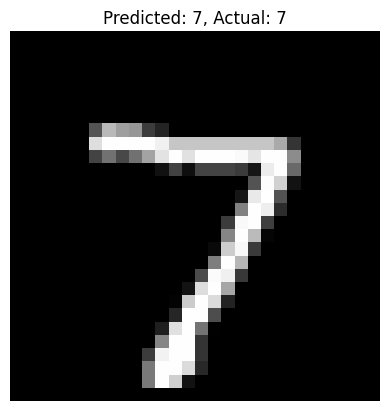

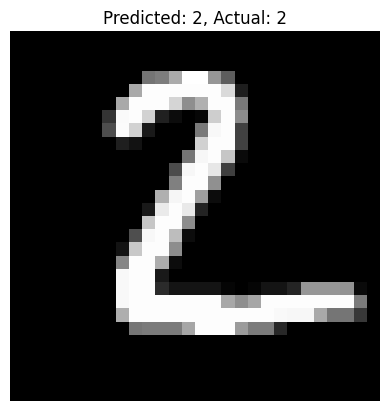

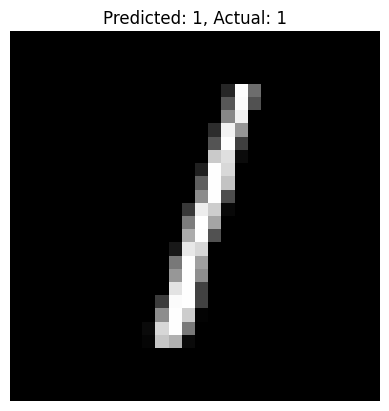

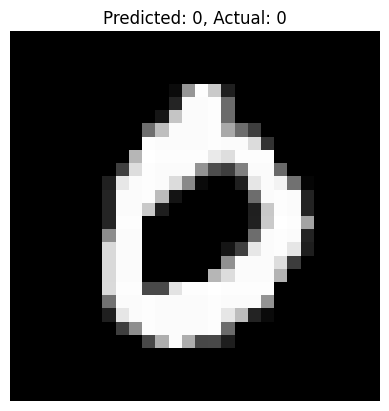

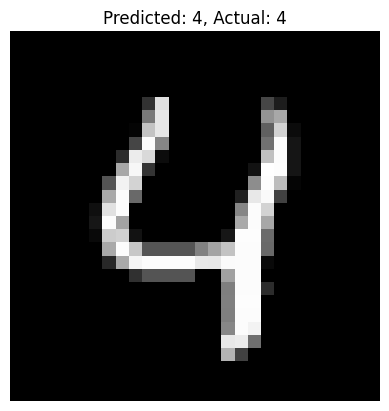

In [6]:
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
    plt.axis("off")
    plt.show()


### Custom Image Prediction using PIL

Saving 1.jpeg to 1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


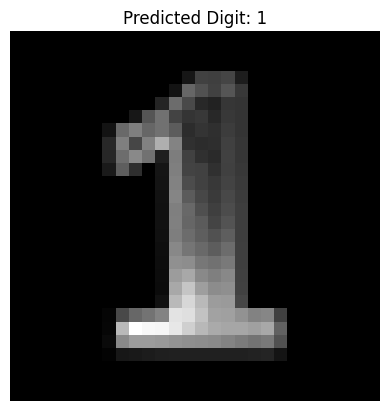

In [10]:
from google.colab import files
from PIL import Image, ImageOps

uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(filename).convert("L")  # Convert to grayscale
    img = ImageOps.invert(img)               # Invert colors (MNIST is white digit on black)
    img = img.resize((28, 28))               # Resize to 28x28

    img_array = np.array(img).astype("float32") / 255.0
    img_array = np.expand_dims(img_array, axis=(0, -1))  # Shape: (1, 28, 28, 1)

    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)

    plt.imshow(img_array.reshape(28,28), cmap="gray")
    plt.title(f"Predicted Digit: {predicted_label}")
    plt.axis("off")
    plt.show()


### Custom Image Prediction using cv2

Saving 1.jpeg to 1 (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


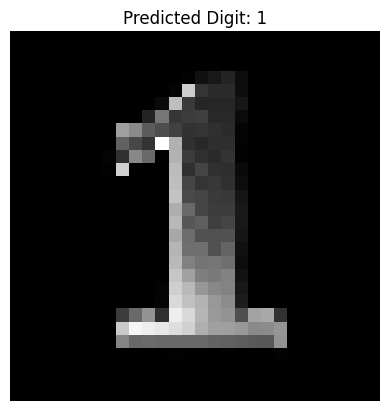

In [11]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    img = cv2.bitwise_not(img)

    img = cv2.resize(img, (28, 28))

    img_array = img.astype("float32") / 255.0

    img_array = np.expand_dims(img_array, axis=(0, -1))

    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)

    plt.imshow(img_array.reshape(28, 28), cmap="gray")
    plt.title(f"Predicted Digit: {predicted_label}")
    plt.axis("off")
    plt.show()
